# Task 01 假设检验1-方法论与一元数值检验
## 作业

三台车床生产同一种滚珠，我们从中各抽取13、14、16个产品，测得直径分别为：

甲车床：15.0,14.5,15.2,15.5,14.8,15.1,15.2,14.8,13.9,16.0,15.1,14.5,15.2;

乙车床：15.2,15.0,14.8,15.2,15.0,15.0,14.8,15.1,14.8,15.0,13.7,14.1,15.5,15.9;

丙车床：14.6,15.0,14.7,13.9,13.8,15.5,15.5,16.2,16.1,15.3,15.4,15,9,15.2,16.0,14.8,14.9

假设显著性水平为$\alpha = 0.1$，问：

1. 甲/乙车床生产的滚珠直径是否服从正态分布？

2. 甲/乙车床生产的滚珠直径的方差是否存在显著性差异？

3. 甲/乙车床生产的滚珠直径是否存在显著性差异？

4. 三台车床生产的滚珠直径是否存在显著性差异？在单因素方差分析中，本题的因素是什么？

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
a = np.array([15.0,14.5,15.2,15.5,14.8,15.1,15.2,14.8,13.9,16.0,15.1,14.5,15.2])
b = np.array([15.2,15.0,14.8,15.2,15.0,15.0,14.8,15.1,14.8,15.0,13.7,14.1,15.5,15.9])
c = np.array([14.6,15.0,14.7,13.9,13.8,15.5,15.5,16.2,16.1,15.3,15.4,15,9,15.2,16.0,14.8,14.9])

### 1. 甲/乙车床生产的滚珠直径是否服从正态分布
——正态分布假设检验

In [3]:
# 定义一个正态性检验函数，它可以输出：
## 正态概率图
## 小样本Shapiro-Wilk检验的p值
## 大样本D'Agostino's K-squared检验的p值

from statsmodels.stats.diagnostic import lilliefors
from typing import List

def check_normality(data: np.ndarray, show_flag: bool=True) -> List[float]:
    """
    输入参数
    ----------
    data : numpy数组或者pandas.Series
    show_flag : 是否显示概率图
    Returns
    -------
    两种检验的p值；概率图
    """

    if show_flag:
        _ = stats.probplot(data, plot=plt)
        plt.show()

    pVals = pd.Series(dtype='float64')
    # D'Agostino's K-squared test
    _, pVals['Omnibus'] = stats.normaltest(data) 

    # Shapiro-Wilk test
    _, pVals['Shapiro-Wilk'] = stats.shapiro(data)

    print(f'数据量为{len(data)}的数据集正态性假设检验的结果 : ----------------')
    print(pVals)

对甲车床

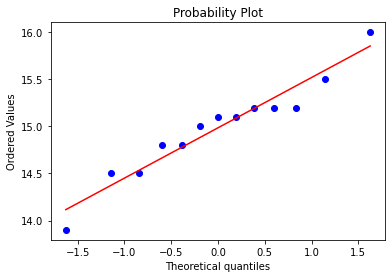

数据量为13的数据集正态性假设检验的结果 : ----------------
Omnibus         0.487527
Shapiro-Wilk    0.717017
dtype: float64


d:\programdata\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [4]:
check_normality(a,show_flag=True)

数据量为13，采用Omnibus的结果，$p=0.487527>\alpha$，可以接受甲车床生产的滚珠直径服从正态分布的假设

对乙车床

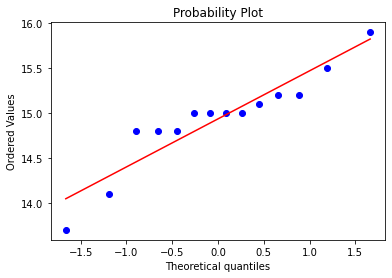

数据量为14的数据集正态性假设检验的结果 : ----------------
Omnibus         0.127615
Shapiro-Wilk    0.111537
dtype: float64


d:\programdata\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


In [5]:
check_normality(b,show_flag=True)

数据量为14，采用Omnibus的结果，$p=0.127615>\alpha$，可以接受乙车床生产的滚珠直径服从正态分布的假设

### 2. 甲/乙车床生产的滚珠直径的方差是否存在显著性差异？
——方差分析-多组样本间的均值相等性检验

In [6]:
from typing import Tuple

def anova_oneway(data = [],alpha = 0.05) -> Tuple[float, float]:

    pVal=pd.Series(dtype='float64')

    # 先做方差齐性检验
    _,pVal['levene'] = stats.levene(*data)
    if pVal['levene']<alpha: #这里假设显著性水平为0.05
        print('警告: 方差齐性检验的p值小于0.05: p={}，方差分析结果在小样本下可能不准确'.format(pVal['levene']))
        print('-------------------------------')

    # 单因素方差分析-假设样本服从正态分布
    _, pVal['anova_oneway_normal'] = stats.f_oneway(*data) # 在这里输入待分析的数据
    
    print('若样本服从正态分布，单因素方差分析的p值为{}'.format(pVal['anova_oneway_normal']))
    if pVal['anova_oneway_normal'] < alpha:
        print('检验在0.05的显著性水平下显著，多组样本中至少存在一组样本均值与其它样本的均值不相等。')

    print('---------------------------------')

    # 单因素方差分析-假设样本不服从正态分布
    _, pVal['anova_oneway_notnormal'] = stats.mstats.kruskalwallis(*data) # 在这里输入待分析的数据
    
    print('若样本不服从正态分布，单因素方差分析的p值为{}'.format(pVal['anova_oneway_notnormal']))
    if pVal['anova_oneway_notnormal'] < alpha:
        print('检验在0.05的显著性水平下显著，多组样本中至少存在一组样本均值与其它样本的均值不相等。')    

    return pVal

In [7]:
anova_oneway(data = [a,b],alpha=0.1)

若样本服从正态分布，单因素方差分析的p值为0.8108623516661462
---------------------------------
若样本不服从正态分布，单因素方差分析的p值为0.7499948397394788


levene                    0.865593
anova_oneway_normal       0.810862
anova_oneway_notnormal    0.749995
dtype: float64

$p=0.865593>\alpha$，甲车床生产的滚珠直径与乙车床方差不存在显著差异

### 3.甲/乙车床生产的滚珠直径是否存在显著性差异
——方差分析-多组样本间的均值相等性检验

由1，甲乙车床生产的滚珠直径均服从正态分布，由2，方差分析-多组样本间的均值相等性检验$p=0.810862>\alpha$，甲车床生产的滚珠直径与乙车床均值不存在显著差异

### 4.三台车床生产的滚珠直径是否存在显著性差异？在单因素方差分析中，本题的因素是什么？
——方差分析-多组样本间的均值相等性检验

首先判断丙车床生产的滚珠直径是否服从正态分布

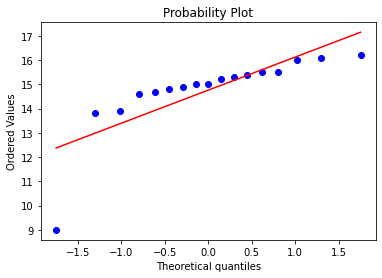

数据量为17的数据集正态性假设检验的结果 : ----------------
Omnibus         9.796679e-08
Shapiro-Wilk    3.649597e-05
dtype: float64


d:\programdata\python\python37\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


In [8]:
check_normality(c,show_flag=True)

数据量为17，采用Omnibus的结果，$p=9.796679e-08<\alpha$，丙车床生产的滚珠直径不服从正态分布

In [9]:
anova_oneway(data = [a,b,c],alpha=0.1)

若样本服从正态分布，单因素方差分析的p值为0.8350931874298759
---------------------------------
若样本不服从正态分布，单因素方差分析的p值为0.8624406173813932


levene                    0.221198
anova_oneway_normal       0.835093
anova_oneway_notnormal    0.862441
dtype: float64

三组样本不全服从正态分布，$p=0.862441>\alpha$，三台车床生产的滚珠直径不存在显著性差异。

在单因素方差分析中，本题的因素是车床因素